<a href="https://colab.research.google.com/github/amannagarkar/Deep-Learning-342/blob/main/DL_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_path = "/content/drive/MyDrive/Data/Peptide-Analysis/train.dat"
test_path = "/content/drive/MyDrive/Data/Peptide-Analysis/test.dat"
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [3]:
train_data.head()

,-1\tDVELDLVEISPNALP
0,-1\tKADEELFNKLFFGT
1,-1\tFLVALHLGTAFALLWYFRKRWCALVRGFFASFGGRRNDDAHMM
2,-1\tRDQMRARIADITGVAISRIA
3,-1\tRKRLQLLLL
4,-1\tPGFCVGEASPLKSPGRRELGHGNLA


In [4]:
train_data.columns = ['String']
train_data = train_data['String'].str.split("\t",n=1 , expand = True )
train_data.columns = ['Class','Peptide']
train_data.head()

,Class,Peptide
0,-1,KADEELFNKLFFGT
1,-1,FLVALHLGTAFALLWYFRKRWCALVRGFFASFGGRRNDDAHMM
2,-1,RDQMRARIADITGVAISRIA
3,-1,RKRLQLLLL
4,-1,PGFCVGEASPLKSPGRRELGHGNLA


In [5]:
train_data.describe()

,Class,Peptide
count,1565,1565
unique,2,1558
top,-1,VFWRRIRVWVIR
freq,1423,2


In [6]:
dict_val = {}
for i in range(0,len(train_data)):
    for j in train_data['Peptide'][i]:
        if j not in dict_val:
            dict_val[j] = 1
        else:
            dict_val[j] += 1

print(dict_val)

{'K': 2509, 'A': 3160, 'D': 1880, 'E': 2482, 'L': 3582, 'F': 1505, 'N': 1399, 'G': 2726, 'T': 1905, 'V': 2613, 'H': 896, 'W': 503, 'Y': 1063, 'R': 2322, 'C': 575, 'S': 2312, 'M': 752, 'Q': 1359, 'I': 2337, 'P': 1648, 'X': 4}


In [7]:
l1 = []
for i in range(0,len(train_data)):
    dict1 = {'K': 0, 'A': 0, 'D': 0, 'E': 0, 'L': 0, 'F': 0, 'N': 0, 'G': 0, 'T': 0, 'V': 0, 'H': 0, 'W': 0, 'Y': 0, 'R': 0, 'C': 0, 'S': 0, 'M': 0, 'Q': 0, 'I': 0, 'P': 0, 'X': 0}
    for j in train_data['Peptide'][i]:
        if j not in dict1:
            dict1[j] = 1
        else:
            dict1[j] += 1
    
    del dict1['X']
    str1=[]
    for k in dict1.values():

            str1.append(int(k))
    l1.append(np.asarray(str1))

In [8]:
train_data['peptide'] = l1
train_data.head(10)

,Class,Peptide,peptide
0,-1,KADEELFNKLFFGT,"[2, 1, 1, 2, 2, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, ..."
1,-1,FLVALHLGTAFALLWYFRKRWCALVRGFFASFGGRRNDDAHMM,"[1, 6, 2, 0, 6, 6, 1, 4, 1, 2, 2, 2, 1, 5, 1, ..."
2,-1,RDQMRARIADITGVAISRIA,"[0, 4, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 4, 0, ..."
3,-1,RKRLQLLLL,"[1, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, ..."
4,-1,PGFCVGEASPLKSPGRRELGHGNLA,"[1, 2, 0, 2, 3, 1, 1, 5, 0, 1, 1, 0, 0, 2, 1, ..."
5,-1,TPEEDTMVMKPLPPEPAP,"[1, 1, 1, 3, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, ..."
6,-1,SKDMRVQR,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, ..."
7,-1,IAASIRHPLHCT,"[0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, ..."
8,-1,HPNLNLFAAGHDGGMIVFK,"[1, 2, 1, 0, 2, 2, 2, 3, 0, 1, 2, 0, 0, 0, 0, ..."
9,1,ALWKTLLKKVLKAYSPWTNF,"[4, 2, 0, 0, 4, 1, 1, 0, 2, 1, 0, 2, 1, 0, 0, ..."


In [9]:
train_data.drop(columns = ['Peptide'])

,Class,peptide
0,-1,"[2, 1, 1, 2, 2, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, ..."
1,-1,"[1, 6, 2, 0, 6, 6, 1, 4, 1, 2, 2, 2, 1, 5, 1, ..."
2,-1,"[0, 4, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 4, 0, ..."
3,-1,"[1, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, ..."
4,-1,"[1, 2, 0, 2, 3, 1, 1, 5, 0, 1, 1, 0, 0, 2, 1, ..."
...,...,...
1560,-1,"[0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, ..."
1561,1,"[1, 0, 0, 0, 0, 4, 0, 3, 0, 0, 2, 3, 0, 4, 0, ..."
1562,1,"[2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, ..."
1563,-1,"[0, 1, 0, 0, 1, 0, 1, 2, 2, 3, 0, 0, 0, 0, 0, ..."


Structure of Networkk modified here

In [10]:
def Sigmoid(Z):
    return 1/(1+np.exp(-Z))

def Relu(Z):
    return np.maximum(0,Z)

def dRelu2(dZ, Z):    
    dZ[Z <= 0] = 0    
    return dZ

def dRelu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def dSigmoid(Z):
    s = 1/(1+np.exp(-Z))
    dZ = s * (1-s)
    return dZ

class dlnet:
    def __init__(self, x, y):
        self.debug = 0;
        self.X=x
        self.Y=y
        self.Yh=np.zeros((1,self.Y.shape[1])) 
        self.L=2
        self.dims = [9, 15, 1] 
        self.param = {}
        self.ch = {}
        self.grad = {}
        self.loss = []
        self.lr=0.003
        self.sam = self.Y.shape[1]
        self.threshold=0.5
        
    def nInit(self):    
        np.random.seed(1)
        self.param['W1'] = np.random.randn(self.dims[1], self.dims[0]) / np.sqrt(self.dims[0]) 
        self.param['b1'] = np.zeros((self.dims[1], 1))        
        self.param['W2'] = np.random.randn(self.dims[2], self.dims[1]) / np.sqrt(self.dims[1]) 
        self.param['b2'] = np.zeros((self.dims[2], 1))                
        return 

    def forward(self):    
        Z1 = self.param['W1'].dot(self.X) + self.param['b1'] 
        A1 = Relu(Z1)
        self.ch['Z1'],self.ch['A1']=Z1,A1
        
        Z2 = self.param['W2'].dot(A1) + self.param['b2']  
        A2 = Sigmoid(Z2)
        self.ch['Z2'],self.ch['A2']=Z2,A2

        self.Yh=A2
        loss=self.nloss(A2)
        return self.Yh, np.mean(loss)

    def nloss(self,Yh):
        loss = (1./self.sam) * (-np.dot(self.Y,np.log(Yh).T) - np.dot(1-self.Y, np.log(1-Yh).T))    
        return loss

    def backward(self):
        dLoss_Yh = - (np.divide(self.Y, self.Yh ) - np.divide(1 - self.Y, 1 - self.Yh))    
        
        dLoss_Z2 = dLoss_Yh * dSigmoid(self.ch['Z2'])    
        dLoss_A1 = np.dot(self.param["W2"].T,dLoss_Z2)
        dLoss_W2 = 1./self.ch['A1'].shape[1] * np.dot(dLoss_Z2,self.ch['A1'].T)
        dLoss_b2 = 1./self.ch['A1'].shape[1] * np.dot(dLoss_Z2, np.ones([dLoss_Z2.shape[1],1])) 
                            
        dLoss_Z1 = dLoss_A1 * dRelu(self.ch['Z1'])        
        dLoss_A0 = np.dot(self.param["W1"].T,dLoss_Z1)
        dLoss_W1 = 1./self.X.shape[1] * np.dot(dLoss_Z1,self.X.T)
        dLoss_b1 = 1./self.X.shape[1] * np.dot(dLoss_Z1, np.ones([dLoss_Z1.shape[1],1]))  
        
        self.param["W1"] = self.param["W1"] - self.lr * dLoss_W1
        self.param["b1"] = self.param["b1"] - self.lr * dLoss_b1
        self.param["W2"] = self.param["W2"] - self.lr * dLoss_W2
        self.param["b2"] = self.param["b2"] - self.lr * dLoss_b2
        
        return


    def pred(self,x, y):  
        self.X=x
        self.Y=y
        comp = np.zeros((1,x.shape[1]))
        pred, loss= self.forward()    
    
        for i in range(0, pred.shape[1]):
            if pred[0,i] > self.threshold: comp[0,i] = 1
            else: comp[0,i] = 0
    
        print("Acc: " + str(np.sum((comp == y)/x.shape[1])))
        
        return comp
    
    def gd(self,X, Y, iter = 3000):
        np.random.seed(1)                         
    
        self.nInit()
    
        for i in range(0, iter):
            Yh, loss=self.forward()
            self.backward()
            if i % 500 == 0:
                
                print(f"Cost after iteration {i} : {loss}" )
                self.loss.append(loss)

        plt.plot(np.squeeze(self.loss))
        plt.ylabel('Loss')
        plt.xlabel('Iter')
        plt.title("Lr =" + str(self.lr))
        plt.show()
    
        return 

In [34]:
x_train = l1[0:1200]
x_val = l1[1201:1564]
y_train = train_data.iloc[0:1200,0].values
y_val = train_data.iloc[1201:1564,0].values

x_train = np.asarray(x_train).T
x_val = np.asarray(x_val).T

y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_train = np.where(y_train<0, 0, y_train)
y_val = np.where(y_val<0, 0, y_val)

y_train = np.reshape(y_train,(1,-1))
y_train = np.reshape(y_train,(1,-1))


In [35]:
nn = dlnet(x_train,y_train)
nn.lr = 0.07
nn.dims = [20, 15, 2] 

Cost after iteration 0 : 0.54508610602038
Cost after iteration 500 : 0.08261559087517839
Cost after iteration 1000 : 0.0653957622449126
Cost after iteration 1500 : 0.05351734926526662
Cost after iteration 2000 : 0.04589521281210868
Cost after iteration 2500 : 0.03997036260174317
Cost after iteration 3000 : 0.035267125905898825
Cost after iteration 3500 : 0.03138110086333398
Cost after iteration 4000 : 0.028072539916369564
Cost after iteration 4500 : 0.0252318216744452
Cost after iteration 5000 : 0.022745202241281615
Cost after iteration 5500 : 0.020484483963766488
Cost after iteration 6000 : 0.01843260017134918
Cost after iteration 6500 : 0.016598443862256652
Cost after iteration 7000 : 0.014857678891878171
Cost after iteration 7500 : 0.01328761942999557
Cost after iteration 8000 : 0.011873821805996282
Cost after iteration 8500 : 0.010683828446083106
Cost after iteration 9000 : 0.009619396146529869
Cost after iteration 9500 : 0.008719127736992939
Cost after iteration 10000 : 0.00792698

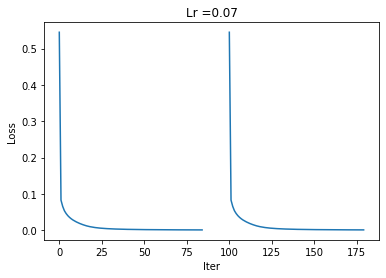

In [37]:
nn.gd(x_train, y_train, iter = 40000)

In [38]:
pred_train = nn.pred(x_train, y_train)
pred_test = nn.pred(x_val, y_val)

Acc: 1.0
Acc: 0.975206611570248


In [168]:

nn.threshold=0.5

nn.X,nn.Y=x, y 
target=np.around(np.squeeze(y), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nn.pred(x,y)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Training Set')

nn.X,nn.Y=xval, yval 
target=np.around(np.squeeze(yval), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nn.pred(xval,yval)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Validation Set')

nn.threshold=0.7

nn.X,nn.Y=x, y 
target=np.around(np.squeeze(y), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nn.pred(x,y)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Training Set')

nn.X,nn.Y=xval, yval 
target=np.around(np.squeeze(yval), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nn.pred(xval,yval)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Validation Set')